<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2400, 8)
X_test shape: (600, 8)
y_train shape: (2400,)
y_test shape: (600,)


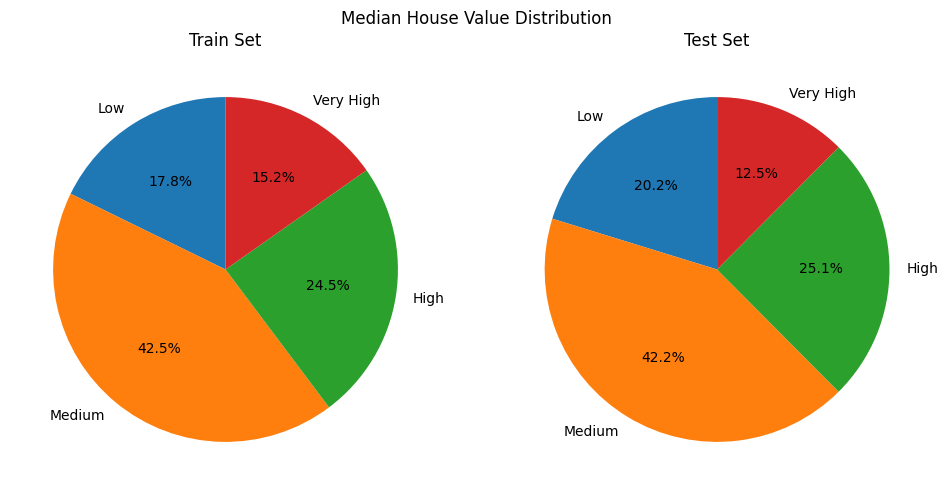

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [0, 100000, 200000, 300000, 500000]
labels = ['Low', 'Medium', 'High', 'Very High']

# Categorize values
train_cat = pd.cut(y_train, bins=bins, labels=labels)
test_cat = pd.cut(y_test, bins=bins, labels=labels)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, data, title in zip(axes, [train_cat, test_cat], ['Train', 'Test']):
    data.value_counts().sort_index().plot.pie(ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{title} Set')
    ax.set_ylabel('')

plt.suptitle('Median House Value Distribution')
plt.tight_layout()
plt.show()


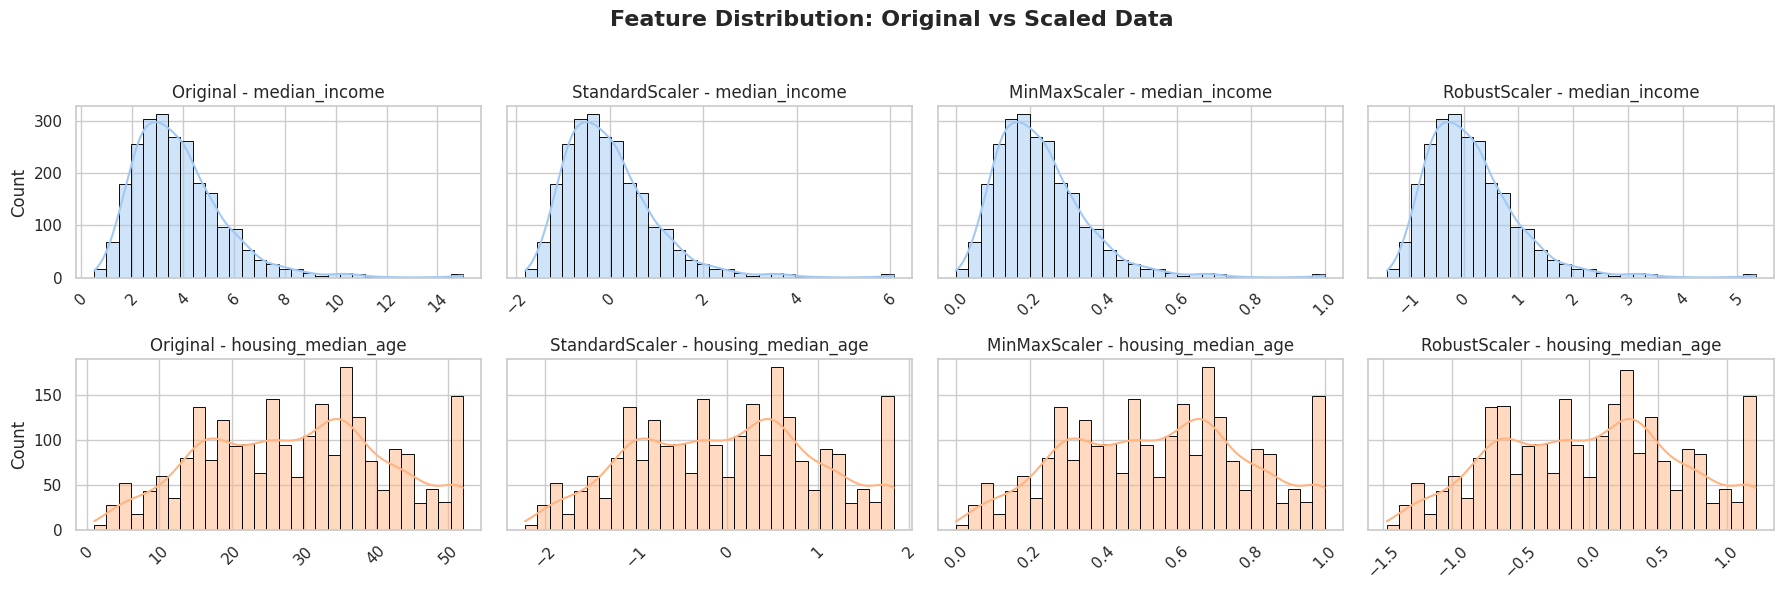

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Set seaborn style
sns.set(style='whitegrid')

# Choose features to visualize
features = ['median_income', 'housing_median_age']

# Initialize scalers
scalers = {
    'Original': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Prepare scaled data
scaled_data = {'Original': X_train[features].copy()}
for name, scaler in scalers.items():
    if name != 'Original':
        scaled = scaler.fit_transform(X_train[features])
        scaled_data[name] = pd.DataFrame(scaled, columns=features)

# Define color palette
colors = sns.color_palette("pastel")

# Plotting
fig, axes = plt.subplots(len(features), len(scaled_data), figsize=(18, 6), sharey='row')

for i, feature in enumerate(features):
    for j, (name, data) in enumerate(scaled_data.items()):
        sns.histplot(data[feature], bins=30, kde=True, color=colors[i % len(colors)],
                     ax=axes[i, j], edgecolor='black')
        axes[i, j].set_title(f'{name} - {feature}', fontsize=12)
        axes[i, j].tick_params(axis='x', rotation=45)
        if j == 0:
            axes[i, j].set_ylabel('Count')
        else:
            axes[i, j].set_ylabel('')
        axes[i, j].set_xlabel('')

# Layout tweaks
plt.suptitle('Feature Distribution: Original vs Scaled Data', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
